# Custom Impedance Fitting Function
Borrowing from the PyEIS Library, this page demonstrates how to use the Electrochemical Spectroscopy fitting function

In [12]:
#PyEIS Library
from PyEIS import *


In [13]:
#Locate the data, prepare for import of the MPT file

#EXAMPLE
path=r"C:\Users\cjang\Desktop\impedance_data\data\\"
data = ['DE_40_2_60.mpt']

In [19]:
#IMPORT THE MPT FILE
#ALSO DETERMINE THE MASK LIMITS OF THE MPT FILE, SO WE CAN HAVE A CLEAN FREQUENCY DOMAIN
#MAY DIVIDE FUNCTION SO THAT WE CAN ADJUST THE MASK LIMITS AFTER IMPORTING
#ALSO PROVIDES A GRAPH OF THE MPT FILE'S NYVQUIST PLOT
#OUTPUTS A DATAFRAME OF THE IMPORTED MPT FILE
#(WILL CREATE OWN CUSTOM OBJECT WHICH DERIVES FROM THE LIBRARY)

def importer(path, data, mask_front = "none", mask_back = "none"):
    mpt_data = EIS_exp(path, data, mask = [mask_front, mask_back])
    df = mpt_data.df_raw
    mpt_data.EIS_plot()
    return [mpt_data, df]

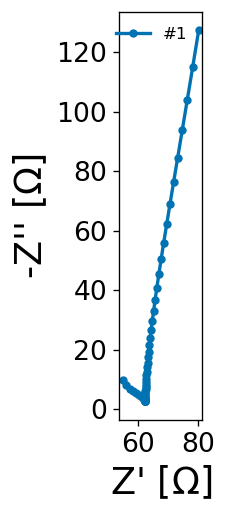

In [56]:
#WE WILL TREAT ONE ITEM AS AN EIS OBJECT, THE OTHER AS A DATAFRAME
pre_df = importer(path, data, 10**6, 10**3)

mpt_data = pre_df[0]

df = pre_df[1]

In [57]:
#USES THE EIS FITTING FUNCTION TO PREDICT THE FREQUENCIES OF THE MPT FILE

#INITIAL ARBITRARY GUESSES
#WILL CREATE A MANUAL FUNCTION THAT CAN ADJUST THE INITIAL GUESSES BUT FOR RIGHT NOW, RUN WITH THESE
Rs_guess = 10

R_guess = 2959
n_guess = 0.8
fs_guess = 23023

R2_guess = 258738
n2_guess = 0.8
fs2_guess = 0.2



#USE THE PARAMETERS DATA STRUCTURE TO WRAP THE INITIAL VALUES
params = Parameters()
params.add('Rs', value=R_guess, min=Rs_guess*.01, max=Rs_guess*100)

params.add('R', value=R_guess, min=R_guess*.1, max=R_guess*10)
params.add('n', value=n_guess, min=.65, max=1.2)
params.add('fs', value=fs_guess, min=10**0.5, max=10**6)
#params.add('Q', value=fs_guess, min=10**0.5, max=10**6)

params.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params.add('n2', value=n2_guess, min=.65, max=1.2)
params.add('fs2', value=fs2_guess, min=10**-2, max=10**1)
#params.add('Q2', value=fs2_guess, min=10**-2, max=10**2)



#FIT THE PARAMETERS ALONG THE R - RQ - RQ CIRCUIT
#LATER WILL PROVIDE OPTIONS TO BENEFITS AND DETRACTIONS OF THE WEIGHT FUNCTION AFTER FURTHER RESEARCH
mpt_data.EIS_fit(params=params, circuit='R-RQ-RQ', weight_func='modulus')
#THIS WILL OUTPUT A SET OF COEFFICIENTS PREDICTED FROM THE FIT

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 52
    # data points      = 120
    # variables        = 7
    chi-square         = 641506.350
    reduced chi-square = 5677.04734
    Akaike info crit   = 1044.08991
    Bayesian info crit = 1063.60236
[[Variables]]
    Rs:   3.38261127 +/- 59.1590331 (1748.92%) (init = 1000)
    R:    295.972089 +/- 183.414238 (61.97%) (init = 2959)
    n:    0.65331613 +/- 0.34823045 (53.30%) (init = 0.8)
    fs:   77818.1979 +/- 68288.2988 (87.75%) (init = 23023)
    R2:   2103166.37 +/- 9.2018e+09 (437522.27%) (init = 258738)
    n2:   1.00435604 +/- 0.71112196 (70.80%) (init = 0.8)
    fs2:  0.13597591 +/- 592.980295 (436092.16%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(R, n)    = -0.950
    C(n2, fs2) =  0.943
    C(R2, n2)  = -0.943
    C(Rs, R)   = -0.872
    C(Rs, n)   =  0.864
    C(R, n2)   =  0.822
    C(fs, n2)  = -0.775
    C(n, n2)   = -0.687
    C(fs, fs

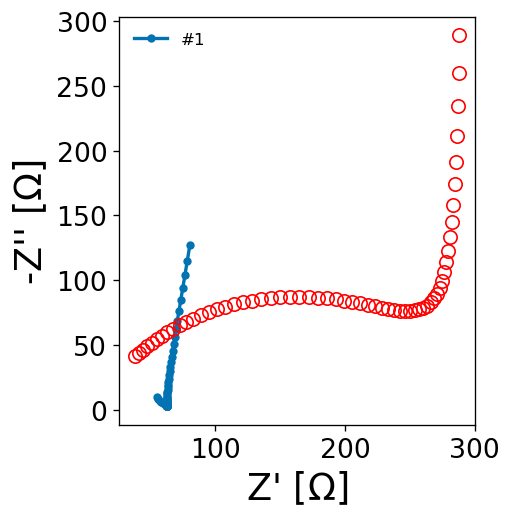

In [59]:
#PLOTS THE PREDICTIONS
mpt_data.EIS_plot(fitting = 'on')
#might give a terrible fit at first glance

cycle || No. RC-elements ||   u
[1]            5            0.8
cycle ||   u
[1]       0.73

number of RC-elements: [1] =  5
cycle || No. RC-elements ||   u
[1]            5            0.8


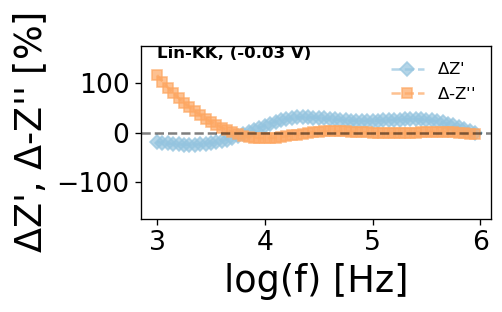

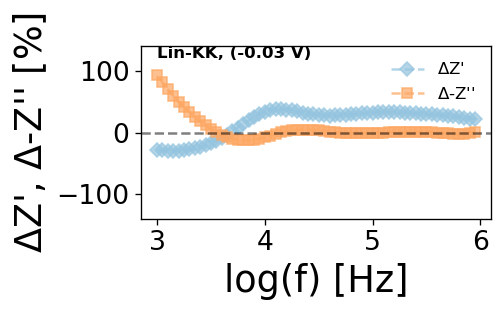

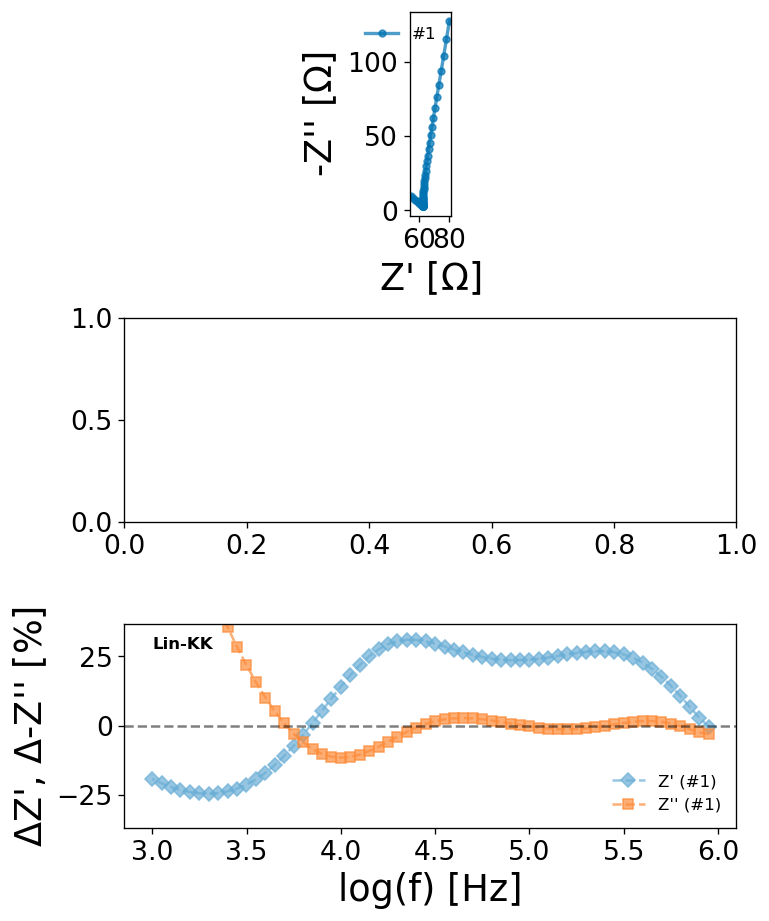

In [60]:
#THIS IS THE LINEAR KRAMER KRONIG ANALYSIS SECTION
#NOT NESSESCARY AT THE MOMENT, BUT THIS WILL HELP ADJUST THE MASK
#WILL HELP PREVENT WITH LONG FITTING PROCESSES

mpt_data.Lin_KK(legend='potential')
ex_num_RC=2
mpt_data.Lin_KK(legend='potential', num_RC = ex_num_RC)
print()
print('number of RC-elements: [1] = ',int(ex_num_RC*mpt_data.decade[0]))
mpt_data.Lin_KK(plot='w_data')

In [61]:
#FIRST BATCH OF FITTED COEFFICIENTS, PLUG BACK INTO THE GUESS FUNCTION TO GET EVEN BETTER BATCH

print(mpt_data.fit_Rs)
print()
print(mpt_data.fit_R)
print(mpt_data.fit_n)
print(mpt_data.fit_fs)
print()
print(mpt_data.fit_R2)
print(mpt_data.fit_n2)
print(mpt_data.fit_fs2)

[3.382611265291708]

[295.97208903392084]
[0.653316128067069]
[77818.19788894062]

[2103166.3747328054]
[1.0043560376741225]
[0.13597591418140084]


In [62]:
guess_package = [mpt_data.fit_Rs[0], mpt_data.fit_R[0], mpt_data.fit_n[0], mpt_data.fit_fs[0], mpt_data.fit_R2[0], mpt_data.fit_n2[0], mpt_data.fit_fs2[0]]
guess_package

[3.382611265291708,
 295.97208903392084,
 0.653316128067069,
 77818.19788894062,
 2103166.3747328054,
 1.0043560376741225,
 0.13597591418140084]

In [63]:
#input: A GUESS PACKAGE OF INITIAL VARIABLE COEFFICIENTS TO CALCULATE THRU CIRCUIT EQ
#output: A NEW GUESS PACKAGE THAT RAN THROUGH ONE ITERATION OF THE GUESS FUNCTION, Possibly use output for another iteration
def guess(guess_package):
    
    #SINGLE ITERATION OF THE GUESS PROCESS
    #USE THIS FUNCTION TO GET CLOSER TO THE IDEAL COEFFICIENTS FOR Rs, R, n, fs, R2, n2, fs2
    #REPEAT THIS FUNCTION UNTIL THE THRESHOLD IS ACHEIVED
    
    params = Parameters()
    
    #adding to the parameters package to send to the fitting function
    params.add('Rs', value=guess_package[0], min=guess_package[0]*.01, max=guess_package[0]*100)
    params.add('R', value=guess_package[1], min=guess_package[1]*.1, max=guess_package[1]*10)
    params.add('n', value=guess_package[2], min=.65, max=1.2)
    params.add('fs', value=guess_package[3], min=10**0.5, max=10**6)
    params.add('R2', value=guess_package[4], min=guess_package[4]*.1, max=guess_package[4]*10)
    params.add('n2', value=guess_package[5], min=.65, max=1.2)
    params.add('fs2', value=guess_package[6], min=10**-2, max=10**1)
    
    #Call to the fitting function given by PyEIS
    mpt_data.EIS_fit(params=params, circuit='R-RQ-RQ', weight_func='modulus')
    
    #maybe take a look at the plots,may help for accuracy, don't really need it...
    mpt_data.EIS_plot(fitting = 'on')
    
    
    #print out the values
    print(mpt_data.fit_Rs)
    print()
    print(mpt_data.fit_R)
    print(mpt_data.fit_n)
    print(mpt_data.fit_fs)
    print()
    print(mpt_data.fit_R2)
    print(mpt_data.fit_n2)
    print(mpt_data.fit_fs2)
    
    #export the new guess package
    guess_package =  ([mpt_data.fit_Rs[0],mpt_data.fit_R[0],mpt_data.fit_n[0],mpt_data.fit_fs[0],mpt_data.fit_R2[0],mpt_data.fit_n2[0],mpt_data.fit_fs2[0]])
    return guess_package

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 710
    # data points      = 120
    # variables        = 7
    chi-square         = 2.06589989
    reduced chi-square = 0.01828230
    Akaike info crit   = -473.431100
    Bayesian info crit = -453.918657
##  Warning: uncertainties could not be estimated:
    R:    at boundary
    n:    at boundary
    fs:   at boundary
[[Variables]]
    Rs:   37.2015277 (init = 3.382611)
    R:    29.5972089 (init = 295.9721)
    n:    0.65000000 (init = 0.6533161)
    fs:   999999.814 (init = 77818.2)
    R2:   3668677.35 (init = 2103166)
    n2:   0.96383223 (init = 1.004356)
    fs2:  0.02419267 (init = 0.1359759)
None
[37.201527744695674]

[29.59720890339225]
[0.6500000000670467]
[999999.8135899628]

[3668677.3483563205]
[0.9638322254020759]
[0.024192665324925124]


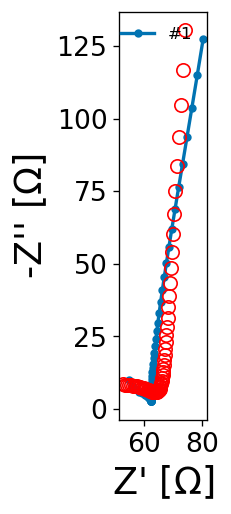

In [64]:
new_guess_package = [i for i in guess(guess_package)]

In [65]:
new_guess_package

[37.201527744695674,
 29.59720890339225,
 0.6500000000670467,
 999999.8135899628,
 3668677.3483563205,
 0.9638322254020759,
 0.024192665324925124]

In [66]:
guess_package

[3.382611265291708,
 295.97208903392084,
 0.653316128067069,
 77818.19788894062,
 2103166.3747328054,
 1.0043560376741225,
 0.13597591418140084]

In [67]:
#THIS VERIFIES WHETHER OR NOT WE'VE ACHEIVED A SATISFACTORY COEFFICIENT PACKAGE
#IF THIS DOESN'T RETURN TRUE, WE RUN THE GUESSER UNTIL IT DOES
def thresh_verif(before, after):
    try:
        total = 0
        for i in range(len(before)):
            total += (before[i] - after[i])
        print(total)    
        return abs(total) <= 1e-10
    except IndexError as e:
        #IF LISTS AREN'T THE SAME LENGTH
        print("Lists are not the same length")
        return

In [68]:
thresh_verif(guess_package, new_guess_package)

-2487459.877737697


False

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 120
    # variables        = 7
    chi-square         = 2.06589989
    reduced chi-square = 0.01828230
    Akaike info crit   = -473.431100
    Bayesian info crit = -453.918657
[[Variables]]
    Rs:   37.2015277 +/- 9.69766793 (26.07%) (init = 37.20153)
    R:    29.5972089 +/- 10.5525834 (35.65%) (init = 29.59721)
    n:    0.65000000 +/- 0.12706118 (19.55%) (init = 0.65)
    fs:   999999.814 +/- 733925.744 (73.39%) (init = 999999.8)
    R2:   3668677.35 +/- 2.9362e+09 (80034.66%) (init = 3668677)
    n2:   0.96383223 +/- 0.01981137 (2.06%) (init = 0.9638322)
    fs2:  0.02419267 +/- 20.0941854 (83059.00%) (init = 0.02419267)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(Rs, R)   = -0.998
    C(Rs, fs)  = -0.996
    C(R, fs)   =  0.991
    C(R, n)    = -0.964
    C(Rs, n)   =  0.949
    C(n, fs)   = -0.942
    C(n2, fs2) =  0.930
    C(R2, n2)

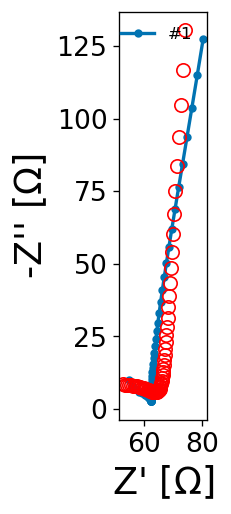

In [69]:
new_new_guess_package = guess(new_guess_package)

In [70]:
thresh_verif(new_guess_package, new_new_guess_package)

4.6563997102566645e-10


False

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 120
    # variables        = 7
    chi-square         = 2.06589989
    reduced chi-square = 0.01828230
    Akaike info crit   = -473.431100
    Bayesian info crit = -453.918657
[[Variables]]
    Rs:   37.2015277 +/- 9.71599975 (26.12%) (init = 37.20153)
    R:    29.5972089 +/- 10.5721591 (35.72%) (init = 29.59721)
    n:    0.65000000 +/- 0.12732022 (19.59%) (init = 0.65)
    fs:   999999.814 +/- 735185.708 (73.52%) (init = 999999.8)
    R2:   3668677.35 +/- 2.9309e+09 (79888.54%) (init = 3668677)
    n2:   0.96383223 +/- 0.01976115 (2.05%) (init = 0.9638322)
    fs2:  0.02419267 +/- 20.0574948 (82907.34%) (init = 0.02419267)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(Rs, R)   = -0.998
    C(Rs, fs)  = -0.996
    C(R, fs)   =  0.991
    C(R, n)    = -0.964
    C(Rs, n)   =  0.949
    C(n, fs)   = -0.942
    C(n2, fs2) =  0.930
    C(R2, n2)

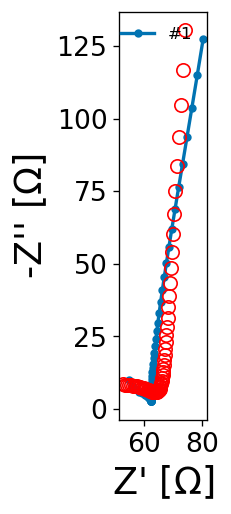

In [71]:
new_new_new_guess_package = guess(new_new_guess_package)

In [72]:
thresh_verif(new_new_guess_package, new_new_new_guess_package)

-9.31368759893303e-10


False

In [73]:
#ITERATIVE GUESSER
def guesser(Rs_guess,R_guess,n_guess,fs_guess,R2_guess,n2_guess,fs2_guess):
    guess_package = [Rs_guess, R_guess, n_guess, fs_guess, R2_guess, n2_guess, fs2_guess]
    new_guess = guess(guess_package)
    while not thresh_verif(guess_package, new_guess):
        guess_package = new_guess
        new_guess = guess(new_guess)
        print(new_guess)
    return new_guess

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7150
    # data points      = 120
    # variables        = 7
    chi-square         = 4.25139504
    reduced chi-square = 0.03762296
    Akaike info crit   = -386.829348
    Bayesian info crit = -367.316906
[[Variables]]
    Rs:   58.9894258 +/- 0.95042783 (1.61%) (init = 40)
    R:    1095.13283 +/- 857962.492 (78343.24%) (init = 2959)
    n:    0.65000002 +/- 0.37124233 (57.11%) (init = 0.8)
    fs:   11.5843247 +/- 14017.0333 (121000.00%) (init = 23023)
    R2:   25873.8000 +/- 8992597.05 (34755.61%) (init = 258738)
    n2:   1.13004791 +/- 4.72263566 (417.91%) (init = 0.8)
    fs2:  6.09429040 +/- 2054.92831 (33718.91%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(R, fs)   = -1.000
    C(R2, fs2) = -0.999
    C(fs, n2)  =  0.991
    C(R, n2)   = -0.991
    C(n2, fs2) =  0.988
    C(R2, n2)  = -0.982
    C(fs, fs2) =  0.964
    C(R, fs2)  = -0.963
    C(fs, R2)  = -0.954
    C(R

[58.98942581644737,
 1095.132832752037,
 0.6500000225494098,
 11.584324663782299,
 25873.800001634656,
 1.1300479095214326,
 6.094290399088267]

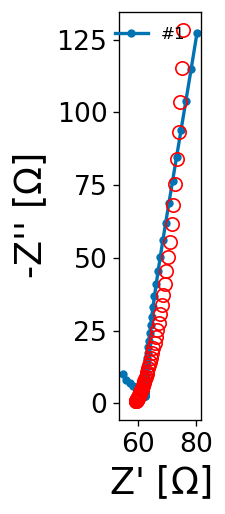

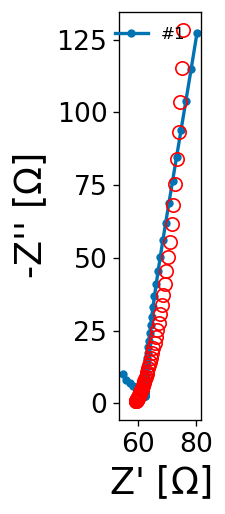

In [74]:
#CUMULATION OF THE FUNCTIONS FROM ABOVE

#GUESSES BROUGHT FROM INIT VALUES
Rs_guess = 40

R_guess = 2959
n_guess = 0.8
fs_guess = 23023

R2_guess = 258738
n2_guess = 0.8
fs2_guess = 0.2


#COMPLETE FUNCTION
guesser(Rs_guess,R_guess,n_guess,fs_guess,R2_guess,n2_guess,fs2_guess)